## Reference


Forward prop:  https://www.scaler.com/meetings/i/nn-forward-and-backward-propagation/archive

Backprop : https://www.scaler.com/meetings/i/nn-n-layer-neural-networks/archive

## Content



- **How to create a model that helps in multiclass classification**
    - Notations

- **Softmax classifier**

- **Categorical Cross entropy**

- **How to train a NN?**
    - Forward Prop
    - Backward Prop (intuition)

***

Lets start working towards our goals that we mentioned earlier

## How to create a model that helps in our multi-class classification?

Coming back to the problem at hand.

> **Our data consists of 3 classes.**

#### Question: Can we use simple logistic regression to classify 3 classes?

No. We can only represent the simple Logitic Regression as a single-neuron model. i.e. predicting 2 classes.

#### Question: How can we modify the existing network to account for multiclass classification ?

Perhaps we can use multiple simple LogReg units (LRUs).



So, instead of using single model,
- we train multiple models

<center><img src='https://drive.google.com/uc?id=1cKo51V8wHKr4iCp3EX-NompxGhU7txGT' width="700"></center>







### Can we do this using a single model ?

 In a multi-class classification (supposedly 3 classes - A,B,C) setting:
- We first need to calculate probabilities for each class for a given data point
- So the model's class prediction for that data point becomes the one with the highest probability




**This gives us the intuition that perhaps, our output layer should have 3 outputs. One for each class.**

So we can have a NN that looks like:-


<center><img src='https://drive.google.com/uc?id=131k2Wo-rcM6w8ZB7twLi2_h4-UKs5ILI' width="700"></center>





Do notice that
- we have same number of outputs (3 outputs)
- and same number of connections (from a single input there are 3 weights connecting to each output)


The difference here is that
- computation is happening together

So, instead of having weight vector,
- we'll have weight matrix multiplying with data matrix.

We'll see it in code later.

A model formed by utilising multiple neurons is called a **Neural Network (NN)**.

Let's learn some notation to make our life easy.

### Notations



####  **Inputs**
 - We have two features for each datapoint: $x_{i1}$ and $x_{i2}$


#### But we have m datapoints?

#### Question: How did we represent m datapoints?

Ans: As a matrix where each row represent a datapoint
$
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{i2} \\
...  & ...  \\
x_{m1} & x_{m2}
\end{bmatrix}$



#### **Neuron**

- Neuron is represented using $f_i$ where
    - i refers to the neuron number

For example: $f_1$ means 1st neuron


#### **Weights**

- Weights are defined by notation: $w_{ij}$ where
    - i is the source neuron
    - j is the destination neuron

Let's define the weight associated with input $x_{i1}$, going to neuron 2, $f_2$ (say) as: $w_{12}$
 - Similarly, we define other weights values as $w_{11}, w_{12}, w_{13}, w_{21}, w_{22}, w_{23}$





####  **Bias**
 - Each neuron will have a bias term associated with it ($b_i$): $b = \begin{bmatrix}
b_1 \space
b_2  \space
b_3
\end{bmatrix}$



#### **z value**
$ $
- z value represent the linear operation i.e additive multiplication of inputs with their respective weights
    - $z_1 =w_{11}. x_{i1}  + w_{21}. x_{i2}$
    - $z_2 =w_{12} .x_{i1}  + w_{22}.x_{i2}$
    - $z_3 = w_{13} .x_{i1} + w_{23}.x_{i2}$
  





#### **Output**
 - Each neuron will apply it's activation function on the z values to outputs: $a_1, a_2, a_3$


<center><img src='https://drive.google.com/uc?id=1LDBuwe2xUQ_CF9ymiHvxzb2ojuYq16oz' width="800"></center>











#### Q. What is the problem with this formulation?



#### What if the model predicts >0.5 for more than one of the classes?



<center><img src='https://drive.google.com/uc?id=10HtCW-GFURe89gFpN2OwcC7Pj1xddHOb' width="800"></center>


- Model will predict the presence of multiple classes in the output - [1, 1, 0], [1, 1, 1], [1, 0, 1]

#### But how can multiple outputs be 1 ?

Recall that we are taking sigmoid of output
- range of $σ ∈ [0,1]$
- and we have sigmoid for each class.

Hence, each probability can be > 0.5 and therefore multiple class labels can be 1.

But, **We want these probabilities values to sum to 1, as the we had in Logistic Regression (p and 1-p)**.

<hr style="border:1px solid gray"> </hr>

## Softmax classifier



#### What constraint do we want on your output probabilities ?

Consider three outputs - $z_{1}$, $z_{2}$, $z_{3}$

- We want a function that should map $z_{1}$, $z_{2}$, $z_{3}$ to output such that
    - sum of output probabilities = 1

#### How can we map the outputs of three neurons in the last layer such that they sum upto 1?
- One such function is a **softmax function**

where
$$p_i = \frac {e^{z_i}} {\sum^k_{i =0} e^{z_i}}$$

Here, $p_i$ refers to the prob. of datapoint belonging to class i
- The denominator here is the normalisation term, to make $p_{1}+ p_{2}+ p_{3}= 1$

<br>

So, softmax can be thought of as sigmoid-like function for multiclass setting.


#### <font color ='red'>(Optional) </font> Question: But why not directly use $\frac{z_i}{\sum^k_{i=0} {z_i}}$? Why to raise the $z$ to power of exponential?

**Intuitive reason** - Ensures that values are **non-negative**, and lie only between 0 and 1.
- as the value of $z_i$ ranges from -∞ to ∞

<br>

Besides this, softmax function has some other desirable properties
1. Nice diferentiable $\frac{de^x}{dx} = e^x$
2. The output probabilities can be interpreted as log likelihoods (log odds)

Lets redraw the flow for an input data-point belonging to class C

![picture](https://drive.google.com/uc?export=view&id=12QEBrbkVaZiK-eXpGC9xI5xTNxjshk8U)


If we were to just use normalized z values instead of exponential
- the ratio of prob would be 1:3:6.

- However, softmax pushes the probability of largest number closer to 1. Hence, the term soft-max



So, we decide to keep **softmax** as the activation function in our NN.


###Soft(MAX) is a function which gives the maximum value softly

**Quiz**

```
Why sigmoid is not preferred in Multi-Class setting ?

- [ ]  Sigmoid gives high probability to any one class
- [ ]  Sigmoid causes no issues
- [ ]  Sigmoid gradients does not suffer plateau at extreme points
- [x]  For sigmoid, One Vs All technique is used which is time intensive
```

Softmax calculator: https://keisan.casio.com/exec/system/15168444286206

> **Assessments COvered:-**
- Sigmoid and softmax functions: https://www.scaler.com/hire/test/problem/20402/

---

We know we can train a simple Logistic Reg model using SGD and all, but

## How to train a NN?



Lets first define some variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 36.1MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [ ]:
# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d = 2
n = 3


#### Question: How many coef parameters $W$ will this system (of three LR/neurons) will have?


- We have 2 features $x_1$ and $x_2$ and which going into 3 LRs --> $d=2$
- Notice that #LRUs/#neurons in last layer = number of classes --> $n = 3$
- Thus, we will have
 - 2 $w$s for LR1, and
 - 2 $w$s for LR2, and
 - 2 $w$s for LR3,

Therefore a total of: $6$



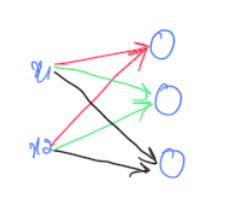


#### Question: What should be the shape of W?




Before deciding on the shape of W, let's take a look at the data matrix, and the output matrix.


> **Data Matrix**

We have a total of $m$ training examples. Each of which contains of $d=2$ features.

So, we have a data matrix $X$, that has the shape: **m x d**

<br>

> **Output matrix**

We know that we're getting 3 values as outputs: probabilities of the data point belonging to class A, B or C respectively.

Let $n=3$.

Therefore, we will get 3 output values for all $m$ examples.

Hence, shape of output matrix is: **m x n**

<br>

> **Weight matrix**

Hence, in order to get the output matrix, as a dot product of data and weight matrices, the shape of weight matrix has to be: **d x n**

$w^1 = \begin{bmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{bmatrix}_{dxn}$

<center><img src='https://drive.google.com/uc?id=1xop0_R5WK6_IBR_k_SDc_4jZV22fQaQf' width="800"></center>




#### Question: How many bias parameters $b$ will this system (of three LR/neurons) have?

- $n=3$ LRUs --> 1 bias term per LRU, thus $n$ bias terms.
- The bias term has to be added to the dot product of $X.W$.
- Therefore, the shape of bias matrix should also be: **m x n**

However, the value of bias will not change for different data points.
- The same bias values can be broadcasted for m examples.
- Therefore, the shape of bias matrix becomes: **1 x n**


#### Vectorized Implementation
![picture](https://drive.google.com/uc?export=view&id=1nQjWBk9q5_2YUMJtM8o8-ZLMOFFrmi_-)


**Quiz**

```
What will be the dimension of Z if X  = 10 x 3 , W = 3 x 2 ?

- [x] 10 x 2
- [ ] 10 x 3
- [ ] 10 x 1
- [ ] 3 x 2
```

**Quiz**

```
How many outcomes are produced from artificial neurons?

- [ ] 2
- [x] 1
- [ ] 5
- [ ] Multiple

```

> **Assessments Covered:-**
- Vectorize: https://www.scaler.com/hire/test/problem/21058/

  
<hr style="border:1px solid gray"> </hr>
  
### Lets train this Softmax Classifier using Gradient Descent

Let's implement the process of training this model using the process we followed earlier


1. Initialise parameters: `W` and `b` matrices
2. Calculate the output using the hypothesis.
3. Calculate the error `J`
4. Repeat until `J` converges
 - update $w_i = w_i - lr* \frac{\partial J}{\partial w_i}$
 - calculate the output using hypothesis and updated params
 - calculate the error `J`


**Step 1**

#### Let's initialise the parameters

In [ ]:
# initialize parameters randomly
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))

**Step 2**

#### Forward propagation

#### Now, lets calculate the output using the hypothesis

We will break this is into three parts
1. calculate `z` using $XW$
2. Apply Softmax on `z`
 - Raising z to exponential $e^z$ => `exp_z`
 - Normalising

Let's compute the logits

In [ ]:
# compute scores for a linear classifier
z = np.dot(X, W) + b
print(z.shape) # should be mXn = #examples X #output

(300, 3)


Lets raise these scores to base $e$, and normalise them to get probabilities

In [ ]:
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True) # explain why axis=1

In [ ]:
probs.shape

(300, 3)

Lets represent this process using a simple computation graph using the matrices.

Here `s` represents softmax funtion



<center><img src='https://drive.google.com/uc?id=1rABeqxpwN2VtSF-J4GNo1MSA9UVPXS4g' width=600></center>




> **Assessment Covered:-**

- Forward propagation (Coding): https://www.scaler.com/hire/test/problem/29677/
- Same layer still different output: https://www.scaler.com/hire/test/problem/19773/
- Will he watch the movie?: https://www.scaler.com/hire/test/problem/19916/

---

## Categorical Cross entropy

#### Question: What loss did we use for logistic regression ?

Ans: Log loss

$Log-loss$ = $y_i.log(ŷ_i) + (1 - y_i).log(1 - ŷ_i)$

#### Question: Can we use this log-loss for multi-class setting ?

**No**. Logloss only deals with binary setting as $ŷ$ over there represent prob. of datapoint belonging to class 1.

We need a loss that can cater to the multi class setting. Let's define a loss

Suppose we have a point $x_i$
- it can belong to one of the k classes i.e. total number of classes are $k$
- Let $P_{ij}$ be the probab. of it belonging to $j^{th}$ class where $∀ j: 1 → k$





#### How will $y_i$ be represented?

$y_i$'s will be **one hot encoded.**

For example: If $y_i$ = 2 i.e. it belong to class 2.
- then only $y_{i2}$ = 1
- rest will be 0

i.e. [0, 1, 0]

**Cross Entropy ($CE_i$)** for $i^{th}$ datapoint will be:

>$CE_i$ = $-∑^k_{j =1}y_{ij}log(P_{ij})$

#### What happens to Cross entropy when k =2? (number of classes = 2)?


When k =2 i.e. class 1 and class 2, CE becomes

$CE_i$ = $- [y_{i1}log(P_{i1}) + y_{i2}log(P_{i2})]$

where
- $y_{i1}, y_{i2}$ are OHE target label
- $P_{i1}, P_{i2}$ are the probab. of datapoint belonging to class 1 and class 2 resp.

Suppose the datapoint belongs to class 1.
- In that case,
    - $y_{i1}$ = 1
    - $y_{i2}$ = 0

Hence, we can write
- $P_{i2}$ as ($1 - P_{i1}$)
- $y_{i2}$ as ($1 - y_{i1}$)

So, we are basically extending log loss to multiclass setting

Do NOTE that,
- Logloss is also known as **Binary Cross entropy**





**quiz**

```
if y_i1 = 1, y_i2 = 0, y_i3 = 0 , log(P_i1) = -0.4,log(P_i2) = -0.5,log(P_i3)= 0.9 then what is CE ?

- [ ] 0
- [ ] -0.4
- [x] 0.4
- [ ] 0.9



```

To summarize,
- In binary setting
    - we use Sigmoid for probability
    - and Binary CE/logloss as loss function

- In multiclass setting,
    - we use softmax to compute class probabilities
    - and Cross entropy as loss function

**Step 3:**
#### Calculate the loss.
- Let's calculate **cross-entropy error**
 - It simplifies to taking log of predicted probability for the actual class
 - Why? Because the other terms will become $y_i*log(\hat{y}_i)$ terms will become zero on multiplying $y_i=0$
 - Lets calculate cross-entropy error for each sample, and call it `error`
 - The full loss is then the average of these log probabilities to compute the loss


In [ ]:
def loss(y, probs):
    m = y.shape[0]
    error = -np.log(probs[range(m), y])
    return np.sum(error)/m
loss(y, probs)

1.0996396683456613

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


![picture](https://drive.google.com/uc?export=view&id=10RpkDV24RUonN49GjuZSW3wWsLkf0wRd)

## Backward propogation

We had the following NN for our multiclass classification

<center><img src='https://drive.google.com/uc?id=1LDBuwe2xUQ_CF9ymiHvxzb2ojuYq16oz' width="800"></center>










Let's draw computational graph for this



<center><img src='https://drive.google.com/uc?id=1B9cHNnwhrLp2tJlle8TmCktltlbtey3Z' width=600></center>





#### Question: How did we decrease the loss in Logistic Regression?

- We calculate partial derivative of J wrt each W and b.
- And then we iteratively updated the params values of $W$ and $b$
- What does the partial derivative explain inituitively? How does J change with a small change in any param?

Problem: **We cannot directly calculate dW and db here**

- But what we can see is the error J is directly dependent on `p`, so we can calculate $\frac{\partial J}{\partial p_i}$ directly
- Further, the `p` in-turn  depend on `z`, and `z` is of course dependent on `W` (and `b`).

#### Lets break this down using chain rule  




<center><img src='https://drive.google.com/uc?id=1b_cQdk8t8YR2GBs78pDFYXZM-dRYwZPJ' width=700></center>





$$\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial z} \frac{\partial z}{\partial w}$$

We can see from the picture that $\frac{\partial J}{\partial z}$ can be calculated using

$$\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial p} \frac{\partial p}{\partial z} \frac{\partial z}{\partial w}$$

- Since, J (cost function) is the final function we want to optimise, we would come across a lot of intermediate calculations like $\frac{\partial J}{\partial <var>}$.
- In Python, we will represent gradients of J, $\frac{\partial J}{\partial w}$ as `dw`.
- And the equation $\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial z} \frac{\partial z}{\partial w}$ can be represented as
$$dw =  dz  \frac{\partial z}{\partial w}$$

Since, we are moving from right to left across the computational graph, we call this process backpropagation.

<hr style="border:1px solid gray"> </hr>

Assessments

- [identify the function](https://www.scaler.com/hire/test/problem/16643/)
- [Value of Weight](https://www.scaler.com/hire/test/problem/20728/)
- [Value of 'a'](https://www.scaler.com/hire/test/problem/21059/)
- [Dance Festival](https://www.scaler.com/hire/test/problem/20396/)